In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 30)
%matplotlib inline

In [100]:
#cleaned data
df1 = pd.read_csv('cleaned_building_data.csv',index_col=False)
#train data
df2 = pd.read_csv('./data/train.csv')

In [101]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.head()

,building_id,age_building,count_floors_pre_eq,height_ft_pre_eq,plinth_area_sq_ft,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,condition_post_eq
0,a3380c4f75,28,1,9,454,1,2,1,2,3,0,0,0,1,0,0,0,0,1,1,0,0,1
1,a3380c4fd9,32,1,9,324,1,2,1,2,3,0,0,0,1,0,0,0,0,1,1,0,0,1
2,a3380c503e,34,2,18,456,1,2,1,2,2,0,0,0,1,0,0,0,0,1,1,0,0,1
3,a338a4e5f2,20,2,18,452,1,2,1,2,2,0,0,0,1,0,0,0,0,1,1,0,0,1
4,a338a4e653,25,1,9,542,1,2,1,2,3,0,0,0,1,0,0,0,0,1,1,0,0,4


In [102]:
df2.dropna(inplace=True)
df2.drop(['vdcmun_id'],axis=1,inplace=True)
df2.replace(['Grade 1','Grade 2','Grade 3','Grade 4','Grade 5'],[0,1,2,3,4],inplace=True)
df2.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,Both,24385bfd2a2,3,24,0,0,0,0,0,0,0,0,0.0
1,Both,405d1bbebbf,1,44,0,0,0,0,0,0,0,0,1.0
2,Both,351d9bc71f6,0,36,0,0,0,0,0,0,0,0,0.0
3,Building removed,2be3a971166,4,30,0,0,0,0,0,0,0,0,0.0
4,Both,34c7d073ea6,2,36,0,0,0,0,0,0,0,0,0.0


In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598344 entries, 0 to 631760
Data columns (total 13 columns):
area_assesed                             598344 non-null object
building_id                              598344 non-null object
damage_grade                             598344 non-null int64
district_id                              598344 non-null int64
has_geotechnical_risk                    598344 non-null int64
has_geotechnical_risk_fault_crack        598344 non-null int64
has_geotechnical_risk_flood              598344 non-null int64
has_geotechnical_risk_land_settlement    598344 non-null int64
has_geotechnical_risk_landslide          598344 non-null int64
has_geotechnical_risk_liquefaction       598344 non-null int64
has_geotechnical_risk_other              598344 non-null int64
has_geotechnical_risk_rock_fall          598344 non-null int64
has_repair_started                       598344 non-null float64
dtypes: float64(1), int64(10), object(2)
memory usage: 63.9+ MB


In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052947 entries, 0 to 1052946
Data columns (total 23 columns):
building_id                               1052947 non-null object
age_building                              1052947 non-null int64
count_floors_pre_eq                       1052947 non-null int64
height_ft_pre_eq                          1052947 non-null int64
plinth_area_sq_ft                         1052947 non-null int64
land_surface_condition                    1052947 non-null int64
foundation_type                           1052947 non-null int64
roof_type                                 1052947 non-null int64
ground_floor_type                         1052947 non-null int64
other_floor_type                          1052947 non-null int64
position                                  1052947 non-null int64
plan_configuration                        1052947 non-null int64
has_superstructure_adobe_mud              1052947 non-null int64
has_superstructure_mud_mortar_stone      

### ANALYSE

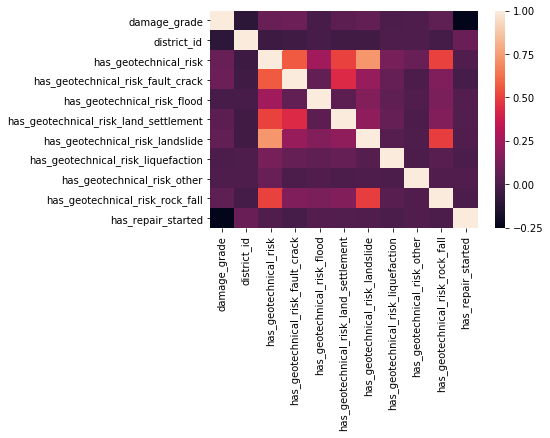

In [105]:
sns.heatmap(df2.corr())

In [106]:
df2.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'district_id',
       'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started'],
      dtype='object')

In [108]:
merge_df = df2[['building_id',
                'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
                'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
                'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
                'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall', 
                'damage_grade']]
merge_df.head()

,building_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,damage_grade
0,24385bfd2a2,0,0,0,0,0,0,0,0,3
1,405d1bbebbf,0,0,0,0,0,0,0,0,1
2,351d9bc71f6,0,0,0,0,0,0,0,0,0
3,2be3a971166,0,0,0,0,0,0,0,0,4
4,34c7d073ea6,0,0,0,0,0,0,0,0,2


In [110]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598344 entries, 0 to 631760
Data columns (total 10 columns):
building_id                              598344 non-null object
has_geotechnical_risk                    598344 non-null int64
has_geotechnical_risk_fault_crack        598344 non-null int64
has_geotechnical_risk_flood              598344 non-null int64
has_geotechnical_risk_land_settlement    598344 non-null int64
has_geotechnical_risk_landslide          598344 non-null int64
has_geotechnical_risk_liquefaction       598344 non-null int64
has_geotechnical_risk_other              598344 non-null int64
has_geotechnical_risk_rock_fall          598344 non-null int64
damage_grade                             598344 non-null int64
dtypes: int64(9), object(1)
memory usage: 50.2+ MB


### MERGING
Merging df1 , merge_df

In [112]:
mergeddf = pd.merge(df1 , merge_df , on='building_id')

In [114]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598344 entries, 0 to 598343
Data columns (total 32 columns):
building_id                               598344 non-null object
age_building                              598344 non-null int64
count_floors_pre_eq                       598344 non-null int64
height_ft_pre_eq                          598344 non-null int64
plinth_area_sq_ft                         598344 non-null int64
land_surface_condition                    598344 non-null int64
foundation_type                           598344 non-null int64
roof_type                                 598344 non-null int64
ground_floor_type                         598344 non-null int64
other_floor_type                          598344 non-null int64
position                                  598344 non-null int64
plan_configuration                        598344 non-null int64
has_superstructure_adobe_mud              598344 non-null int64
has_superstructure_mud_mortar_stone       598344 non-nul

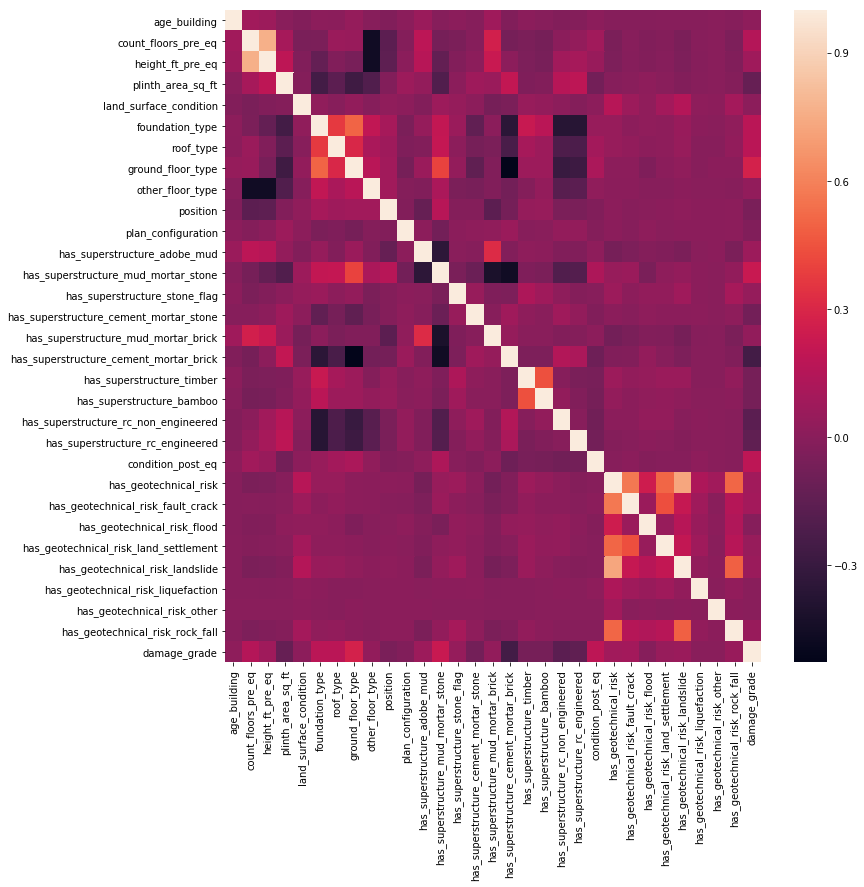

In [122]:
plt.figure(figsize=(12, 12))
sns.heatmap(mergeddf.corr())

In [125]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598344 entries, 0 to 598343
Data columns (total 32 columns):
building_id                               598344 non-null object
age_building                              598344 non-null int64
count_floors_pre_eq                       598344 non-null int64
height_ft_pre_eq                          598344 non-null int64
plinth_area_sq_ft                         598344 non-null int64
land_surface_condition                    598344 non-null int64
foundation_type                           598344 non-null int64
roof_type                                 598344 non-null int64
ground_floor_type                         598344 non-null int64
other_floor_type                          598344 non-null int64
position                                  598344 non-null int64
plan_configuration                        598344 non-null int64
has_superstructure_adobe_mud              598344 non-null int64
has_superstructure_mud_mortar_stone       598344 non-nul

In [126]:
mergeddf.to_csv('all_cleaned.csv')